<a href="https://colab.research.google.com/github/secant78/Breast-Cancer-Analysis-Using-LDA-and-QDA/blob/main/Final_617_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import math
import string
#import data set to list
import glob
import pandas as pd
import numpy as np


#"/content/drive/My Drive/"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fileName = r'/content/drive/My Drive/617_Project/data.csv'

cancerData= pd.read_csv(fileName, engine='python') #opens the file in read mode
 #puts the file into an array
        #words['a'] = words['a'].str.join(" ") 
        #print(words)

#import pandas as pd
#import chardet
#with open(fileName, 'rb') as f:
#    result = chardet.detect(f.read())  # or readline if the file is large


#pd.read_csv(fileName, encoding=result['encoding'])


cancerData.head()






,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Create Training Test Data

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score
%matplotlib inline

LDA Code with PCA data

In [ ]:
from sklearn.model_selection import train_test_split

mPCA = cancerData.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
X=mPCA

#y = cancerData['diag']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["B", "M"])
#le.classes_
le.transform(["B", "M"])



y = le.transform(cancerData['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(mPCA, y, test_size=0.3, random_state=202012)

print(X_train.shape)
print(X_test.shape)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)





(398, 30)
(171, 30)


In [ ]:
mPCA

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

lda = LinearDiscriminantAnalysis()

modelLDA = lda.fit(X_train, y_train)
#model.size
#print(model.priors_)
#print(model.means_)
predLDA=modelLDA.predict(X_test)

In [ ]:
accuracy = lda.score(X_test, y_test)
#rint(accuracy)
#get the mean of each fold 
print("Accuracy of Model is:",accuracy * 100)
print("Misclassification Error Rate is:", (1-accuracy) * 100)
missclass_rate = (1-accuracy) * 100

#print(misclass_rate_total)



Accuracy of Model is: 95.32163742690058
Misclassification Error Rate is: 4.678362573099415


In [ ]:
print(confusion_matrix(predLDA, y_test))
print(classification_report(y_test, predLDA, digits=3))
cm_lda_pca = confusion_matrix(predLDA, y_test)

[[101   8]
 [  0  62]]
              precision    recall  f1-score   support

           0      0.927     1.000     0.962       101
           1      1.000     0.886     0.939        70

    accuracy                          0.953       171
   macro avg      0.963     0.943     0.951       171
weighted avg      0.957     0.953     0.953       171



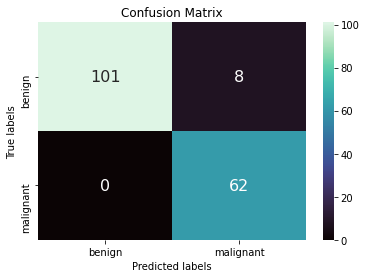

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sn

import matplotlib.pyplot as plt

cm_lda_pca = confusion_matrix(predLDA, y_test)
cm_lda_pca.astype(int)

df_cm = pd.DataFrame(cm_lda_pca, range(2), range(2))

ax = plt.subplot()
plt.figure()
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', ax = ax, cmap= "mako")


ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);

#print(df_cm)

AUC of ROC Curve: 0.9885431400282886


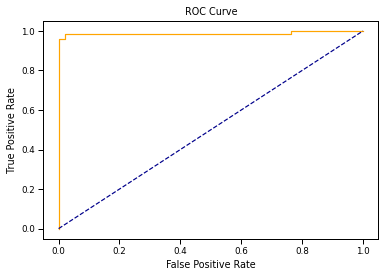

In [ ]:
scores_LDA = modelLDA.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, scores_LDA)

roc_auc = roc_auc_score(y_test, scores_LDA)
print("AUC of ROC Curve:", roc_auc)

plt.plot(fpr, tpr,color='orange', label='ROC')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

Start QDA

In [ ]:
qda = QuadraticDiscriminantAnalysis()
modelQDA = qda.fit(X_train, y_train)
#print(model2.priors_)
#print(model2.means_)
predQDA = modelQDA.predict(X_test)

In [ ]:
print(np.unique(predQDA, return_counts=True))
print(confusion_matrix(predQDA, y_test))
print(classification_report(y_test, predQDA, digits=3))

cm_qda = confusion_matrix(predQDA, y_test)

(array([0, 1]), array([98, 73]))
[[95  3]
 [ 6 67]]
              precision    recall  f1-score   support

           0      0.969     0.941     0.955       101
           1      0.918     0.957     0.937        70

    accuracy                          0.947       171
   macro avg      0.944     0.949     0.946       171
weighted avg      0.948     0.947     0.948       171



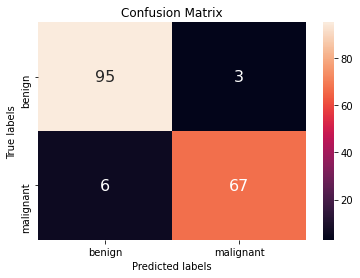

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sn
cm_qda.astype(int)


df_cm_qda = pd.DataFrame(cm_qda, range(2), range(2))

ax= plt.subplot()
plt.figure()
sn.heatmap(df_cm_qda, annot=True, annot_kws={"size": 16}, fmt='g', ax = ax)
ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);
#print(df_cm_qda)

AUC of ROC Curve: 0.9875530410183876


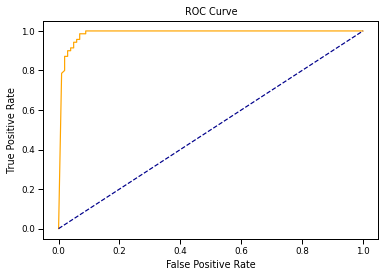

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

scores_QDA = modelQDA.predict_proba(X_test)[:,1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, scores_QDA)

roc_auc2 = roc_auc_score(y_test, scores_QDA)
print("AUC of ROC Curve:", roc_auc2)

plt.plot(fpr2, tpr2,color='orange', label='ROC')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [ ]:
accuracy2 = qda.score(X_test, y_test)
print(accuracy2)
#get the mean of each fold 
print("Accuracy of Model is:",accuracy2 * 100)
print("Misclassification Error Rate is:", (1-accuracy2) * 100)
missclass_rate2 = (1-accuracy2) * 100


0.9473684210526315
Accuracy of Model is: 94.73684210526315
Misclassification Error Rate is: 5.263157894736848


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
nnModel = mlp.fit(X_train, y_train)
pred_nnModel = nnModel.predict(X_test)

In [ ]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print(np.unique(pred_nnModel, return_counts=True))
print(confusion_matrix(pred_nnModel, y_test))
print(classification_report(y_test, pred_nnModel, digits=3))

cm_nnModel = confusion_matrix(pred_nnModel, y_test)

(array([0, 1]), array([103,  68]))
[[100   3]
 [  1  67]]
              precision    recall  f1-score   support

           0      0.971     0.990     0.980       101
           1      0.985     0.957     0.971        70

    accuracy                          0.977       171
   macro avg      0.978     0.974     0.976       171
weighted avg      0.977     0.977     0.977       171



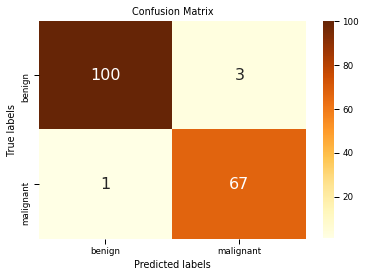

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sn
cm_nnModel.astype(int)


df_cm_nn = pd.DataFrame(cm_nnModel, range(2), range(2))

ax= plt.subplot()
plt.figure()
sn.heatmap(df_cm_nn, annot=True, annot_kws={"size": 16}, fmt='g', ax = ax, cmap="YlOrBr")
ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);
#print(df_cm_qda)

AUC of ROC Curve: 0.9994342291371994


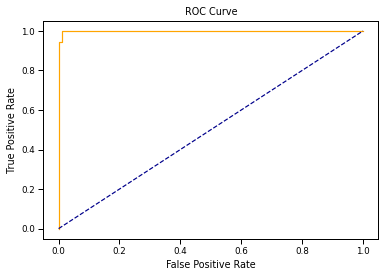

In [ ]:
scores_NN = nnModel.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, scores_NN)

roc_auc3 = roc_auc_score(y_test, scores_NN)
print("AUC of ROC Curve:", roc_auc3)

plt.plot(fpr3, tpr3,color='orange', label='ROC')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [ ]:
accuracy3 = mlp.score(X_test, y_test)
print(accuracy3)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy3 * 100)
print("Misclassification Error Rate is:", (1 - accuracy3) * 100)
missclass_rate3 = (1-accuracy3) * 100

misclass_rate_mean3 = mean(missclass_rate3)
misclass_rate_mean3

0.9766081871345029
Accuracy of Model with Cross Validation is: 97.6608187134503
Misclassification Error Rate is: 2.3391812865497075


2.3391812865497075

In [ ]:
import pandas as pd
modelsUsed = {'Models':['LDA','QDA','LR','SVM Lin','SVM Rad','RF','NN','Class Tree'],'Misclassification Error Rate':[4.68, 5.27, 2.92, 1.75, 0, 3.5 , 2.92, 5.85]}   
              #'LDA': [5.263], 'QDA': [2.92397], 'Logistic Regression': [2.92], 'SVM': [0.0351], 'Neural Network':[1.169], 'Classification Tree':[5.85] }
error_df = pd.DataFrame(modelsUsed)

In [ ]:
error_df

,Models,Misclassification Error Rate
0,LDA,4.68
1,QDA,5.27
2,LR,2.92
3,SVM Lin,1.75
4,SVM Rad,0.00
5,Random Forest,3.50
6,NN,2.92
7,Class Tree,5.85


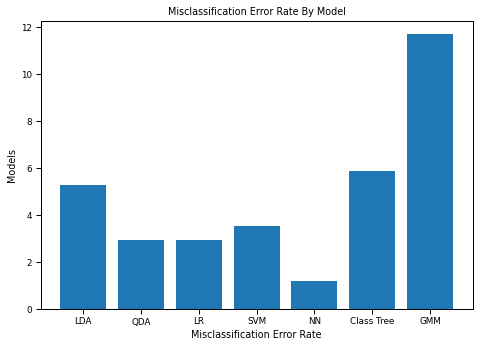

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
modelUsed = ['LDA', 'QDA', 'LR', 'SVM', 'NN', 'Class Tree', 'GMM']
error_rate = [5.263, 2.92397, 2.92, 3.51, 1.169, 5.85, 11.7]
ax.bar(modelUsed, error_rate)


ax.set_ylabel('Models')
ax.set_xlabel('Misclassification Error Rate')
ax.set_title('Misclassification Error Rate By Model')

plt.show()
plt.close()


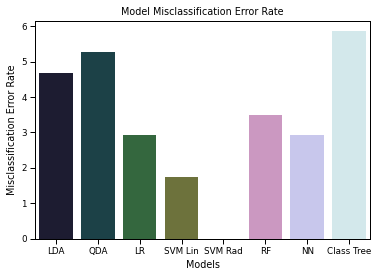

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper')



# create plot
sns.barplot(x = 'Models', y = 'Misclassification Error Rate', data = error_df, palette="cubehelix")
plt.title('Model Misclassification Error Rate')
plt.show()

In [ ]:
from sklearn import mixture
#from sklearn.mixture import GMM

g = mixture.GaussianMixture(n_components=2, max_iter = 1000)
# Generate random observations with two modes centered on 0
 # and 10 to use for training.

gModel = g.fit(X_train, y_train) 


In [ ]:
gpred = gModel.predict(X_test)

In [ ]:
print(confusion_matrix(gpred, y_test))
print(classification_report(y_test, gpred, digits=3))
cm_gmm = confusion_matrix(gpred, y_test)

[[91  4]
 [10 66]]
              precision    recall  f1-score   support

           0      0.958     0.901     0.929       101
           1      0.868     0.943     0.904        70

    accuracy                          0.918       171
   macro avg      0.913     0.922     0.916       171
weighted avg      0.921     0.918     0.919       171



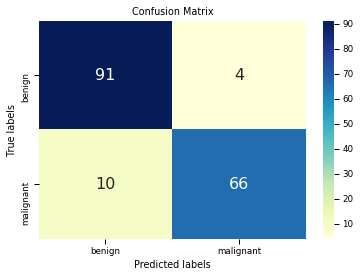

<Figure size 432x288 with 0 Axes>

In [ ]:
import seaborn as sn
cm_gmm = confusion_matrix(gpred, y_test)
cm_gmm.astype(int)

df_cm = pd.DataFrame(cm_gmm, range(2), range(2))

ax = plt.subplot()
plt.figure()
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='g', ax = ax, cmap="YlGnBu")


ax.set_title('Confusion Matrix'); 
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['benign', 'malignant']); ax.yaxis.set_ticklabels(['benign', 'malignant']);

AUC of ROC Curve: 0.9615275813295615


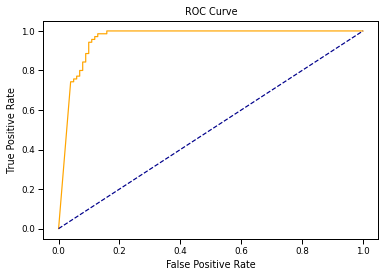

In [ ]:
scores_GMM = g.predict_proba(X_test)[:,1]
fpr5, tpr5, thresholds5 = roc_curve(y_test, scores_GMM)

roc_auc5 = roc_auc_score(y_test, scores_GMM)
print("AUC of ROC Curve:", roc_auc5)

plt.plot(fpr5, tpr5,color='orange', label='ROC')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [ ]:
accuracy5 = g.score(X_test, y_test)
print(accuracy5)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy5)
print("Misclassification Error Rate is:", (1 - accuracy5))
missclass_rate5 = (1-accuracy5) * 100

misclass_rate_mean5 = mean(missclass_rate5)
misclass_rate_mean5

-8.017073955789597
Accuracy of Model with Cross Validation is: -8.017073955789597
Misclassification Error Rate is: 9.017073955789597


901.7073955789597

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.cluster import KMeans

modelKMeans = KMeans(n_clusters=2, random_state=202012).fit(mPCA)

yKMeans = y.reshape(-1, 1)

predKMeans = modelKMeans.predict(mPCA)



In [ ]:
print(modelKMeans.cluster_centers_)

[[1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]
 [1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]]


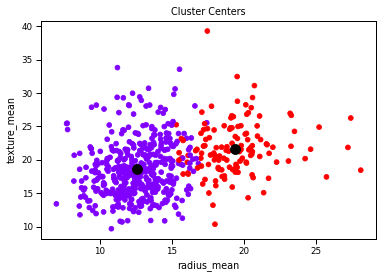

In [ ]:
plt.scatter(mPCA.loc[:,'radius_mean'], mPCA.loc[:,'texture_mean'],  c=modelKMeans.labels_,cmap='rainbow')
plt.scatter(modelKMeans.cluster_centers_[:,0] ,modelKMeans.cluster_centers_[:,1] ,color='black', s=100)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Cluster Centers')
plt.show()
plt.close()

In [ ]:
#4 clusters SS
modelKMeans.inertia_

77943099.87829883

In [ ]:
#2 clusters SS
modelKMeans.inertia_


77943099.87829883

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X.iloc[:, 0], X.iloc[:, 1], s=40, zorder=2)
    ax.axis('equal')
    plt.xlabel('radius_mean')
    plt.ylabel('texture_mean')
    plt.title('Gaussian Mixture Model')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [ ]:
gModel.covariances_[1]

array([[14.39617662, -2.22269637],
       [-2.22269637, 16.50374409]])

In [ ]:
firstTwoX = X.drop(X.iloc[:,2:], axis=1)

In [ ]:
firstTwoX

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


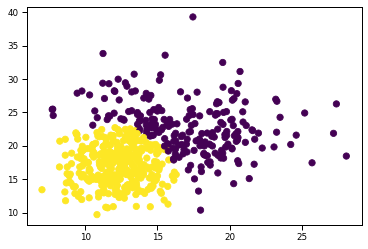

In [ ]:
initialize_full_g = mixture.GaussianMixture(n_components=2, max_iter=1000)
fullgmodel = g.fit(firstTwoX,y)
fullgpred = g.predict(firstTwoX)
plt.scatter(X.loc[:, 'radius_mean'], X.loc[:, 'texture_mean'], c=fullgpred, s=40, cmap='viridis');

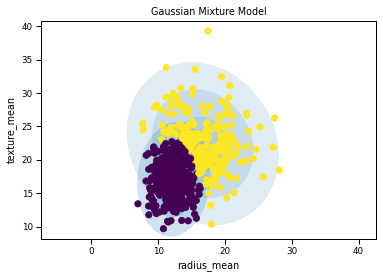

In [ ]:
plot_gmm(fullgmodel, firstTwoX)


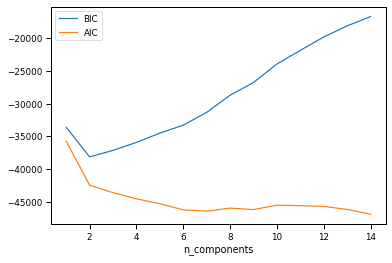

In [ ]:
n_components = np.arange(1, 15)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
